In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
#Base
import pandas as np #untuk mengolah dataset
import numpy as np  #untuk perhitungan

#plotting --> untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

#disable warning
import warnings
warnings.filterwarnings("ignore")

#Machine Learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

#Evaluation --> pengecekan model apakah sudah bagus atau belum
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import confusion_matrix

#Train-Test Split
from sklearn.model_selection import train_test_split

#Cross Validation --> untuk mengatasi data-data yang tidak balance
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

#Grid Search --> untuk mencari hyperparameter terbaik
from sklearn.model_selection import GridSearchCV

#Save Model
import pickle
import requests
import json


OSError: dlopen(/Users/dmg/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/dmg/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)

In [10]:
#Import dataset 
df  = pd.read_csv('diabetes.csv')

In [11]:
#Menampilkan dataset
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
#check missing values dan tipe data yang tidak sama
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
# samakan type data , ubah integer ke float
df = df.astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


<AxesSubplot:>

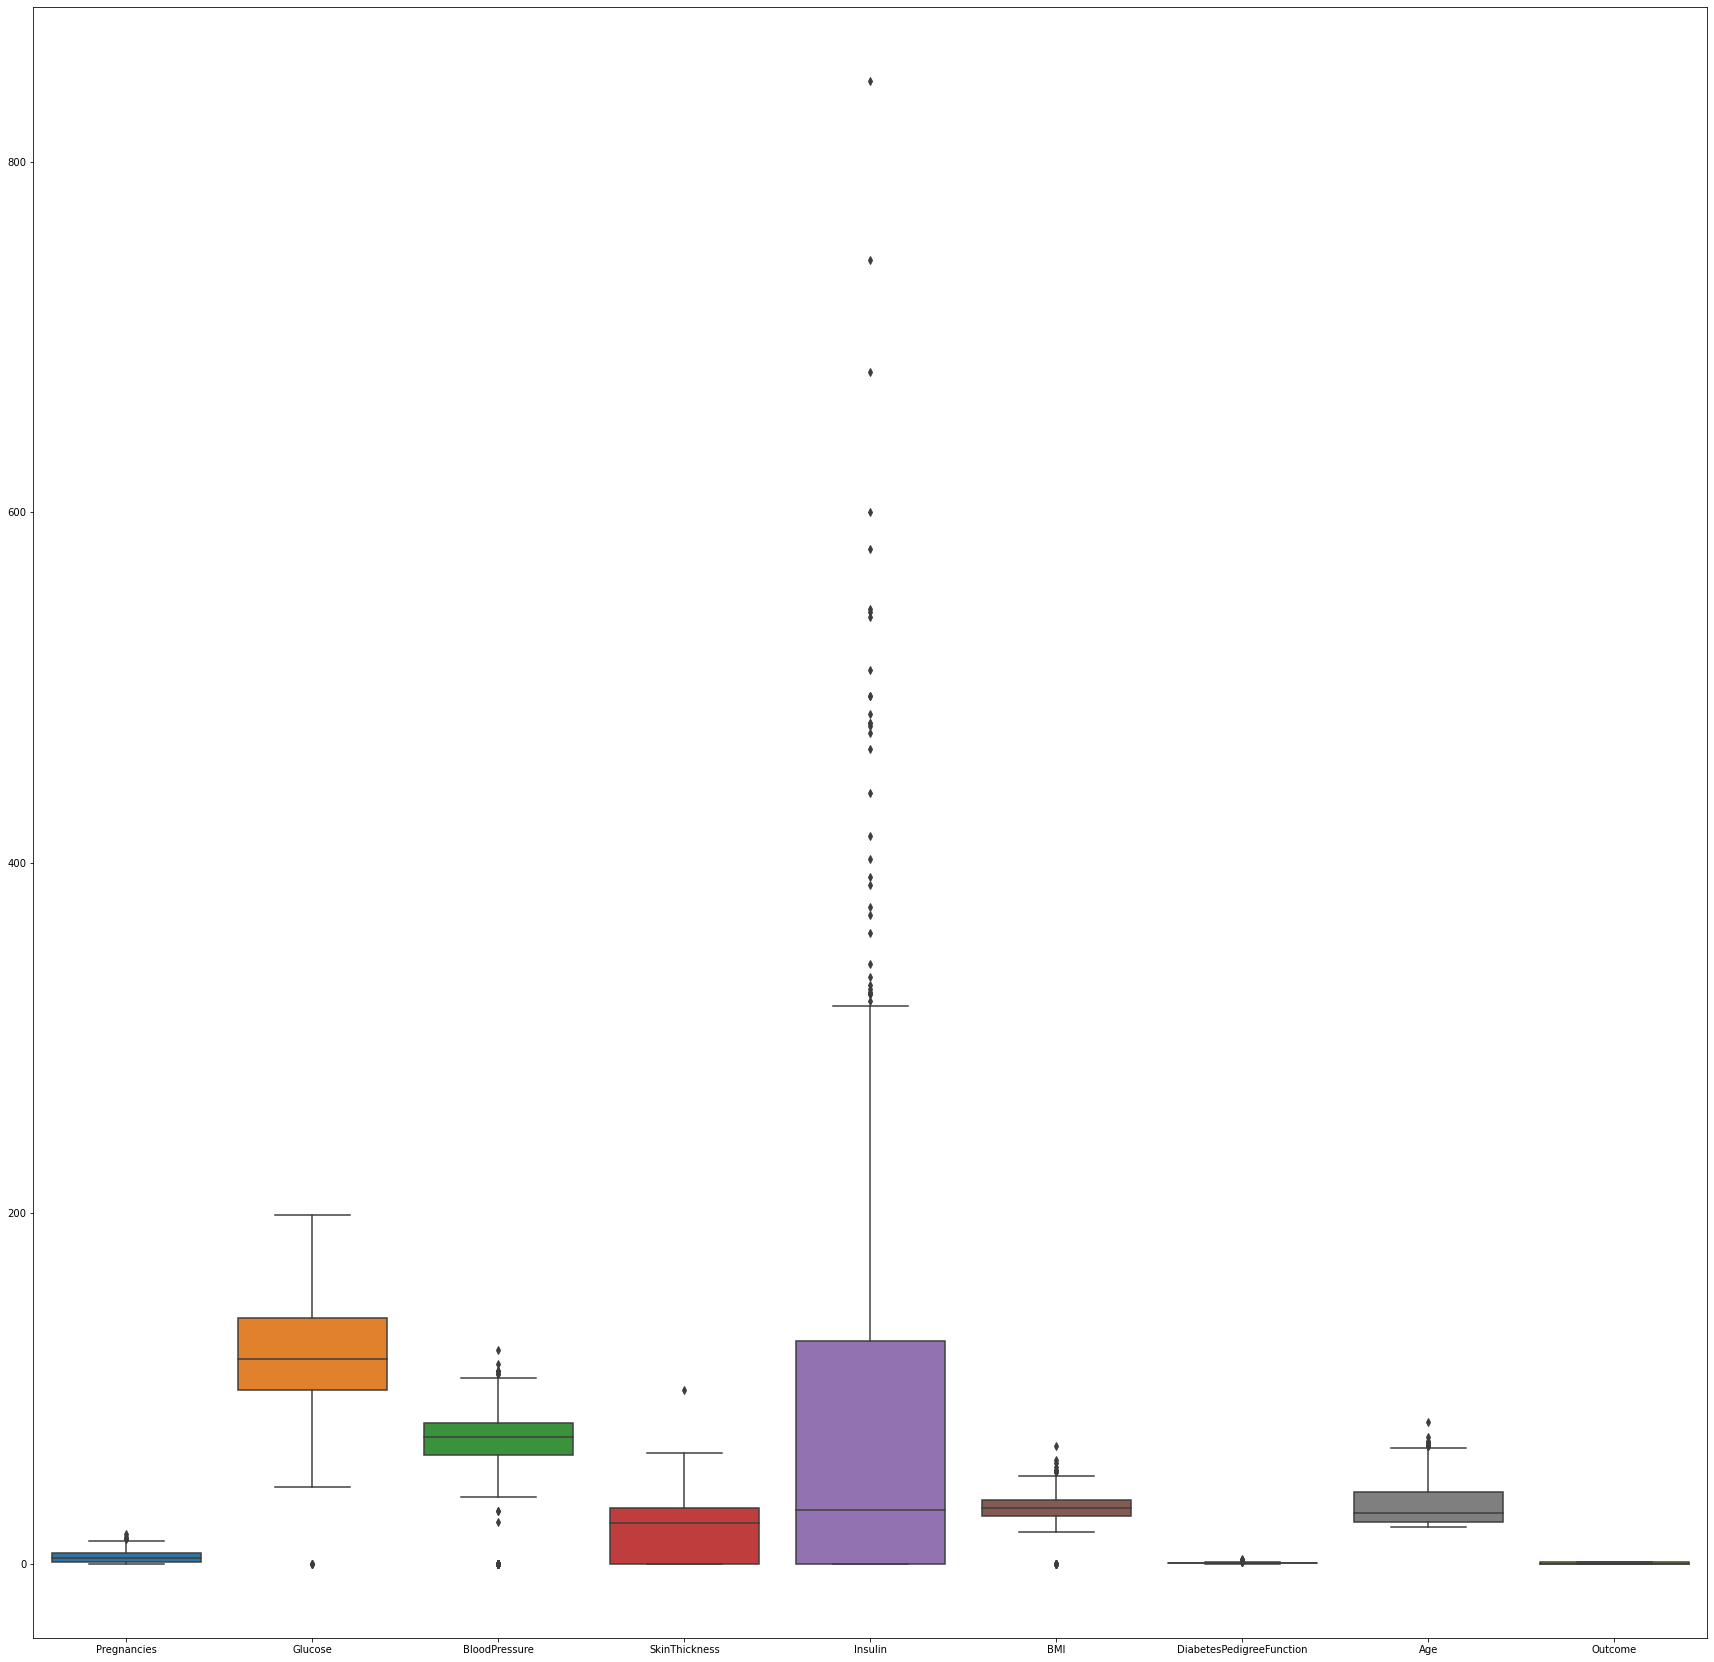

In [14]:
#check outlier using box plot (untuk cek data yang melenceng jauh, karena akan membuat model menjadi jelek)
fig, ax = plt.subplots(figsize = (30,30))
sns.boxplot(data=df)

In [15]:
# Mengatasi outlier IQR cara 1 (datanya harus numerik)
Q3 = (df[df.columns]).quantile(0.75)
Q1 = (df[df.columns]).quantile(0.25)
IQR = Q3 - Q1

lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR

more_than = (df > upper_range)
lower_than = (df < lower_range)

df = df.mask(more_than, upper_range, axis = 1)
df = df.mask(lower_than, lower_range, axis = 1)
    
    
    

<AxesSubplot:>

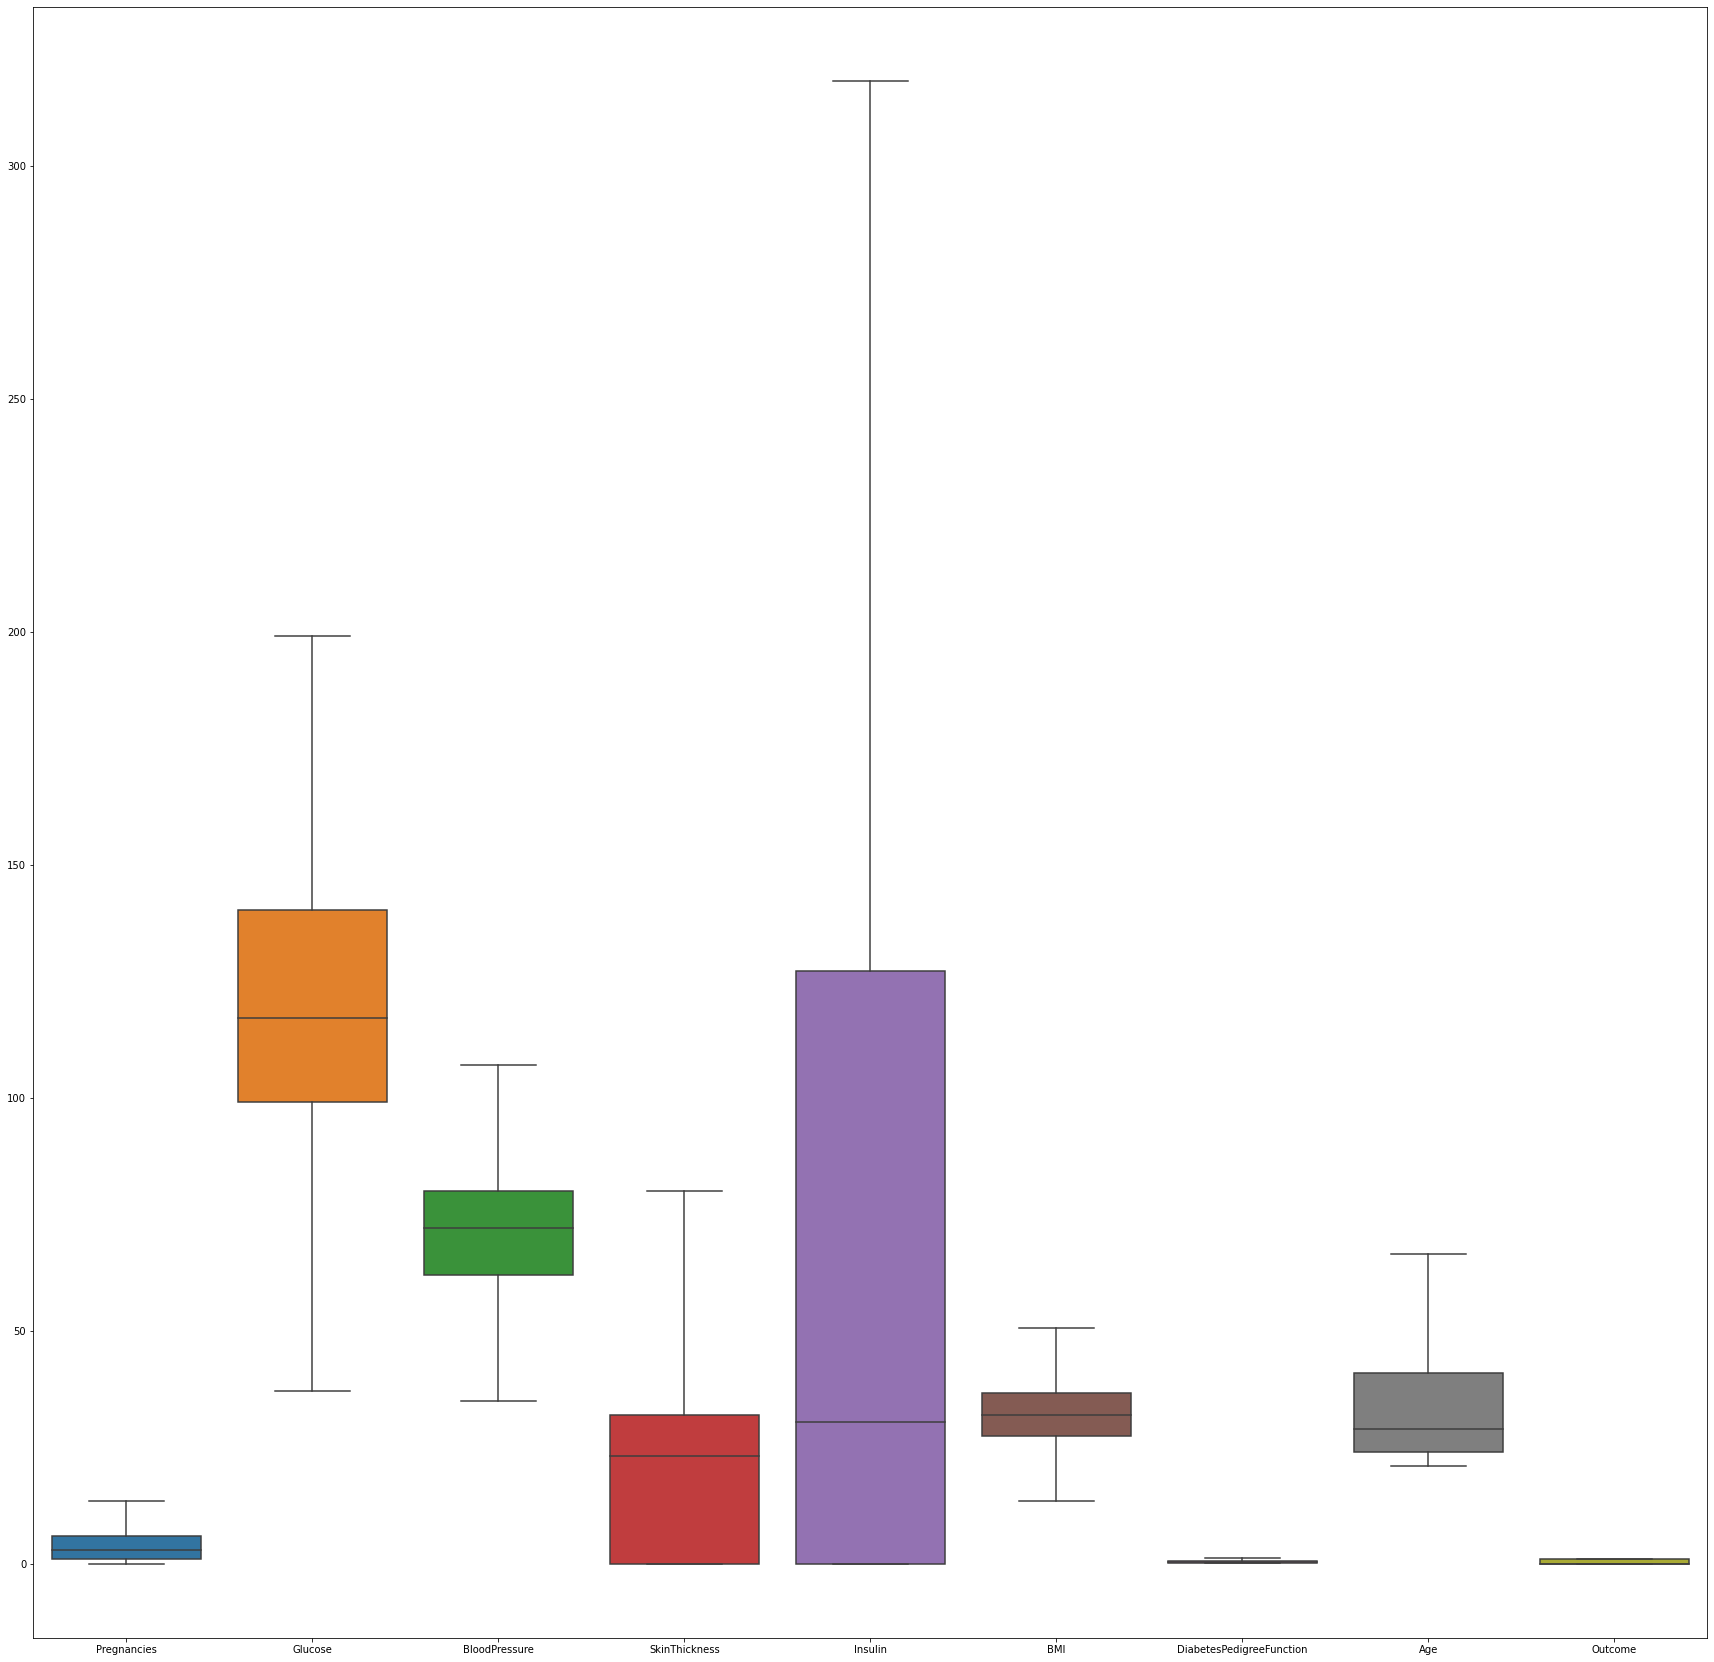

In [16]:
#check outlier after handling outlier
fig, ax = plt.subplots(figsize = (30,30))
sns.boxplot(data=df)

In [17]:
 # Removing the outliers IQR cara 2 --> harus di run beberapa kali, agar outliernya hilang
# def removeOutliers(data, col):
#     Q3 = np.quantile(data[col], 0.75)
#     Q1 = np.quantile(data[col], 0.25)
#     IQR = Q3 - Q1

#     print("IQR value for column %s is: %s" % (col, IQR))
#     global outlier_free_list
#     global filtered_data

#     lower_range = Q1 - 1.5 * IQR
#     upper_range = Q3 + 1.5 * IQR
#     outlier_free_list = [x for x in data[col] if (
#         (x > lower_range) & (x < upper_range))]
#     filtered_data = data.loc[data[col].isin(outlier_free_list)]


# for column in df.columns:
#     if column == df.columns[0]:
#         removeOutliers(df, column)
#     else:
#         removeOutliers(filtered_data, column)

# # Assigning filtered data back to our original variable
# df = filtered_data
# print("Shape of data after outlier removal is: ", df.shape)


In [18]:
#check outlier after handling outlier
# fig, ax = plt.subplots(figsize = (30,30))
# sns.boxplot(data=df)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

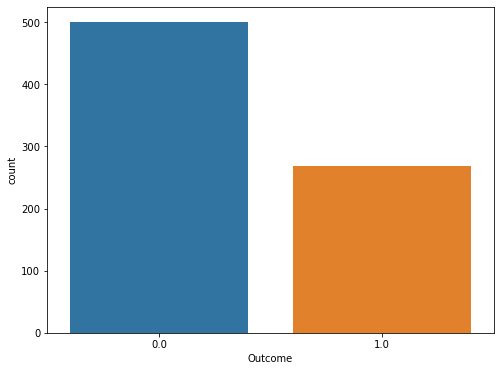

In [19]:
#cek data balance
plt.figure(figsize=(8,6))
sns.countplot(df.Outcome)


<AxesSubplot:>

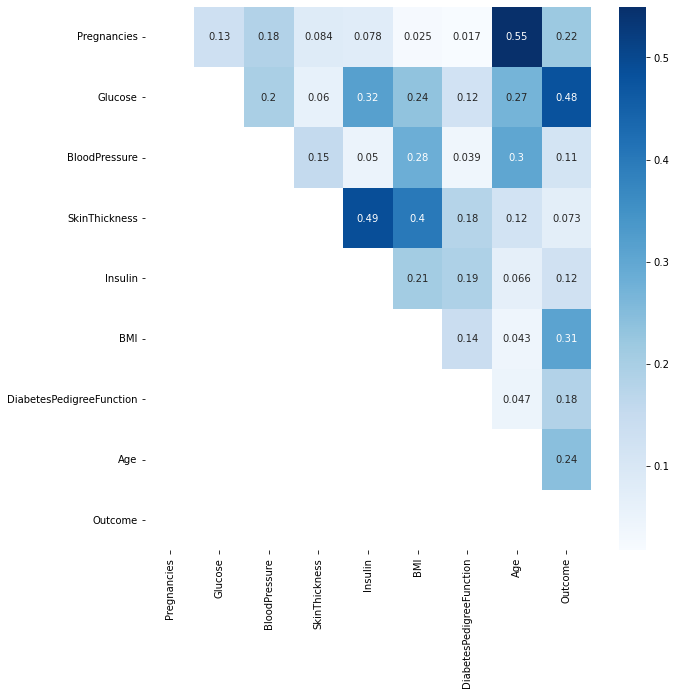

In [20]:
#karena data tidak balance, maka cek kolerasi matriks nya, jika ada yang korelasi nya diatas batas, maka bisa hapus salah satu kolom
#correlation matrix
corr_matrix = df.corr().abs()

#select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k =1).astype(np.bool))

plt.figure(figsize=(10,10))
sns.heatmap(upper, annot = True, cmap = 'Blues')

In [ ]:
#memisahkan x dan y
y = df['Outcome']
X = df.drop(['Outcome'],1)
X.head()


In [ ]:
# Modelling Algorithms

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

## Collect all model in one list
all_model = [DecisionTreeClassifier,
            LogisticRegression,
             KNeighborsClassifier,
             GaussianNB,
            SVC,
            LinearSVC,
            RandomForestClassifier,
            GradientBoostingClassifier,
            ExtraTreesClassifier,
             XGBClassifier]

model_name = ['DecisionTreeClassifier',
            'LogisticRegression',
             'KNeighborsClassifier',
             'GaussianNB',
            'SVC',
            'LinearSVC',
            'RandomForestClassifier',
            'GradientBoostingClassifier',
            'ExtraTreesClassifier',
             'XGBClassifier']
## loop for all model

datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]

for idx, model_type in enumerate(all_model):
    num = 1
    AccTrain = []
    AccTest = []
    RecallTemp = []
    PrecisionTemp = []
    AucTemp = []
    nfold = 1
    for train_index,test_index in kf.split(X,y): 

        print("----------BEFORE------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")
        
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
        model = model_type()
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        AccTrain.append(model.score(X_train , y_train))
        AccTest.append(model.score(X_test , y_test))
        RecallTemp.append(recall_score(y_test,y_pred))
        PrecisionTemp.append(precision_score(y_test,y_pred))
        AucTemp.append(roc_auc_score(y_test, y_pred))
        
        print("----------AFTER------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")
        
        nfold += 1
    
    print("----------FINAL------------")
    print("{} Acc Train: {}".format(model_name[idx], np.mean(AccTrain)))
    print("{} Acc Test: {}".format(model_name[idx], np.mean(AccTest)))
    print("{} Recall: {}".format(model_name[idx], np.mean(RecallTemp)))
    print("{} Precission: {}".format(model_name[idx], np.mean(PrecisionTemp)))
    print("{} AUC: {}".format(model_name[idx], np.mean(AucTemp)))
    print("---------------------------")
    datatr.append(np.mean(AccTrain))
    datasc.append(np.mean(AccTest))
    Recall.append(np.mean(RecallTemp))
    Precision.append(np.mean(PrecisionTemp))
    auc.append(np.mean(AucTemp))

In [ ]:
## compare model each other
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = datatr
data_hasil['Accuracy test'] = datasc
data_hasil['Precision'] = Precision
data_hasil['Recall']= Recall
data_hasil['AUC']=auc
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
data_hasil.sort_values(by='Accuracy test',ascending=False)

gap yang terbaik adalah yang terendah utk menentukan apakah data overfitting

In [ ]:
#grid search
model = LogisticRegression(max_iter = 4000)
param = dict()
param['solver'] = ['newton-og', 'lbfgs', 'liblinear']
param['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
param['C'] = [ 0.00001, 0.0001, 0.001, 0.003, 0.005, 0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1,2,3,4,5,10,20,100]

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)

In [ ]:
clf1 = GridSearchCV(model, param, scoring = 'roc_auc', n_jobs=1, cv=cv, verbose = True)
clf1.fit(X,y)

In [ ]:
print('Best score: {}'.format(clf1.best_score_))
print('Best hyperParameter: {}'.format(clf1.best_params_))

In [ ]:
#clf1 = GridSearchCV(model, param, scoring = 'recall', n_jobs=1, cv=cv, verbose = True)
#clf1.fit(X,y)

clf2 = GridSearchCV(model, param, scoring = 'accuracy', n_jobs=1, cv=cv, verbose = True)
clf2.fit(X,y)

In [ ]:
print('Best score: {}'.format(clf2.best_score_))
print('Best hyperParameter: {}'.format(clf2.best_params_))

In [ ]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

print("X_train dataset shape :", X_train.shape)
print("y_train dataset shape :", y_train.shape)
print("X_test dataset shape :", X_test.shape)
print("y_test dataset shape :", y_test.shape)

In [ ]:
#melatih model
model_fit0 = LogisticRegression(**clf2.best_params_).fit(X_train, y_train)

In [ ]:
# test model
y_pred_train0 = model_fit0.predict(X_train)
print(classification_report(y_train, y_pred_train0))

In [ ]:
#confusion matrix
cm_train = confusion_matrix(y_pred_train0, y_train)
print("confusion_matrix : {}".format(cm_train))
sns.heatmap(cm_train , annot = True, cmap= "Blues", fmt = '0.3g')

ada 48 data asli diabetes tapi model memprediksi sehat, harus di kecilin lagi. model yang di bibangun masih belum bagus